# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
#adding a dependency
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Building my url
url = "https://api.openweathermap.org/data/2.5/weather?"
appid = weather_api_key
units = "imperial"
query_url = f"{url}appid={appid}&units={units}"

In [5]:
#Making a list for the api request
city_weather = []

#Fulfilling print requirement as starter code specified
print("Beginning Data Retrieval")
print("---------------------------")

#Create a loop for api call
count=1
for city in cities:
    query_url = f"{url}appid={appid}&units={units}&q={city}"
    
    #Print statement as starter code requested
    print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
    
    #Run api request for each city
    try:
        
        city_weather_request = requests.get(query_url).json()
        
        #Converting request to variables
        city_lat = city_weather_request["coord"]["lat"]
        city_long = city_weather_request["coord"]["lat"]
        city_max_temp = city_weather_request["main"]["temp_max"]
        city_humidity = city_weather_request["main"]["humidity"]
        city_cloudiness = city_weather_request["clouds"]["all"]
        city_windspeed = city_weather_request["wind"]["speed"]
        city_country = city_weather_request["sys"]["country"]
        city_date = city_weather_request["dt"]
        
        #Converting these into columns in dataframe 
        city_weather.append({"City": city_lat,
                            "Lat": city_lat,
                            "Long": city_long,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_cloudiness,
                            "Wind Speed": city_windspeed,
                            "Country": city_country,
                            "Date": city_date})
        
    except:
        
        print("City not found. Skipping...")
    count=count+1
    pass

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")


Beginning Data Retrieval
---------------------------
Processing Record 1 of 643 | seoul
Processing Record 2 of 643 | balasheyka
Processing Record 3 of 643 | sao joao da barra
Processing Record 4 of 643 | albany
Processing Record 5 of 643 | vila franca do campo
Processing Record 6 of 643 | barrow
Processing Record 7 of 643 | terney
Processing Record 8 of 643 | korla
Processing Record 9 of 643 | cape town
Processing Record 10 of 643 | winnemucca
Processing Record 11 of 643 | ushuaia
Processing Record 12 of 643 | killybegs
Processing Record 13 of 643 | taolanaro
City not found. Skipping...
Processing Record 14 of 643 | borama
City not found. Skipping...
Processing Record 15 of 643 | comodoro rivadavia
Processing Record 16 of 643 | bredasdorp
Processing Record 17 of 643 | olafsvik
Processing Record 18 of 643 | hermanus
Processing Record 19 of 643 | port blair
Processing Record 20 of 643 | peniche
Processing Record 21 of 643 | bengkulu
Processing Record 22 of 643 | avarua
Processing Record 

Processing Record 193 of 643 | talnakh
Processing Record 194 of 643 | ocos
Processing Record 195 of 643 | souillac
Processing Record 196 of 643 | constitucion
Processing Record 197 of 643 | severo-kurilsk
Processing Record 198 of 643 | castro
Processing Record 199 of 643 | manggar
Processing Record 200 of 643 | nyurba
Processing Record 201 of 643 | sawakin
Processing Record 202 of 643 | teya
Processing Record 203 of 643 | griffith
Processing Record 204 of 643 | paka
Processing Record 205 of 643 | lahaina
Processing Record 206 of 643 | olavarria
Processing Record 207 of 643 | hobart
Processing Record 208 of 643 | ust-kamchatsk
City not found. Skipping...
Processing Record 209 of 643 | lavrentiya
Processing Record 210 of 643 | katsuura
Processing Record 211 of 643 | helong
Processing Record 212 of 643 | davila
Processing Record 213 of 643 | martinsburg
Processing Record 214 of 643 | auki
Processing Record 215 of 643 | northam
Processing Record 216 of 643 | arraial do cabo
Processing Reco

Processing Record 389 of 643 | kyshtovka
Processing Record 390 of 643 | sao bento do sul
Processing Record 391 of 643 | manzil jamil
City not found. Skipping...
Processing Record 392 of 643 | nambucca heads
Processing Record 393 of 643 | namibe
Processing Record 394 of 643 | pontalina
Processing Record 395 of 643 | erode
Processing Record 396 of 643 | savannah bight
Processing Record 397 of 643 | varia
Processing Record 398 of 643 | acapulco
Processing Record 399 of 643 | tiznit
Processing Record 400 of 643 | bulembu
Processing Record 401 of 643 | bacolod
Processing Record 402 of 643 | calvinia
Processing Record 403 of 643 | samalaeulu
City not found. Skipping...
Processing Record 404 of 643 | karaul
City not found. Skipping...
Processing Record 405 of 643 | clyde river
Processing Record 406 of 643 | xichang
Processing Record 407 of 643 | yingkou
Processing Record 408 of 643 | beringovskiy
Processing Record 409 of 643 | marsala
Processing Record 410 of 643 | tripoli
Processing Record 4

Processing Record 586 of 643 | mullaitivu
City not found. Skipping...
Processing Record 587 of 643 | tongliao
Processing Record 588 of 643 | banes
Processing Record 589 of 643 | tombouctou
Processing Record 590 of 643 | bowen
Processing Record 591 of 643 | ozinki
Processing Record 592 of 643 | corrales
Processing Record 593 of 643 | boende
Processing Record 594 of 643 | fasa
Processing Record 595 of 643 | san carlos
Processing Record 596 of 643 | batagay-alyta
Processing Record 597 of 643 | marovoay
Processing Record 598 of 643 | gawler
Processing Record 599 of 643 | tucurui
Processing Record 600 of 643 | hoyanger
Processing Record 601 of 643 | karauzyak
City not found. Skipping...
Processing Record 602 of 643 | rodez
Processing Record 603 of 643 | touros
Processing Record 604 of 643 | waipawa
Processing Record 605 of 643 | almaznyy
Processing Record 606 of 643 | martin
Processing Record 607 of 643 | waddan
Processing Record 608 of 643 | havoysund
Processing Record 609 of 643 | vilyuys

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Converting City Weather Dict to DataFrame
city_weather_pd = pd.DataFrame(city_weather)

#Exporting into a csv
city_weather_pd.to_csv("WeatherPy.csv",index=False)

#Showing a count
city_weather_pd.count()

City          595
Lat           595
Long          595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [7]:
#Displaying my city weather DataFrame
city_weather_pd.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,37.5683,37.5683,37.5683,90.79,66,40,8.05,KR,1659584533
1,53.2841,53.2841,53.2841,68.63,75,96,5.41,RU,1659584737
2,-21.6403,-21.6403,-21.6403,67.26,87,0,2.17,BR,1659584737
3,42.6001,42.6001,42.6001,72.66,72,1,3.49,US,1659584563
4,37.7167,37.7167,37.7167,73.81,94,39,5.21,PT,1659584738


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_weather_pd.max()

City             78.2186
Lat              78.2186
Long             78.2186
Max Temp          102.88
Humidity             100
Cloudiness           100
Wind Speed         32.77
Country               ZM
Date          1659584976
dtype: object

In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

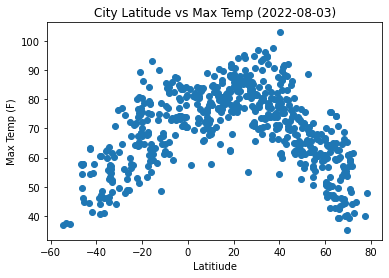

In [14]:
plt.scatter(city_weather_pd['Lat'], city_weather_pd['Max Temp'])
plt.title('City Latitude vs Max Temp' + ' (' +str(datetime.now().date()) + ')')
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitiude")
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression